## Import libraries

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import preprocess_input
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization
from keras import layers, Model
from keras.optimizers import Adam
import matplotlib
from matplotlib import pyplot as plt
import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

## Data Visualization

Text(0.5, 1.0, 'Number of Training images per Class:')

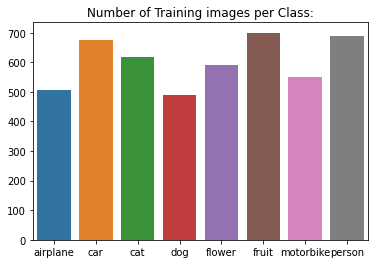

In [2]:
train_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Train"
val_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Validation/"
test_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Test/"
class_names = sorted(os.listdir(train_data_dir))

train_img_cat = []
val_img_cat = []
test_img_cat = []
for classes in class_names:
    train_folder = train_data_dir + '/' + classes
    train_img_cat.append(len(os.listdir(train_folder)))

for classes in class_names:
    val_folder = val_data_dir + '/' + classes
    val_img_cat.append(len(os.listdir(val_folder)))

for classes in class_names:
    test_folder = test_data_dir + '/' + classes
    test_img_cat.append(len(os.listdir(test_folder)))

sns.barplot(x=class_names, y=train_img_cat).set_title("Number of Training images per Class:")

Text(0.5, 1.0, 'Number of Validation images per Class:')

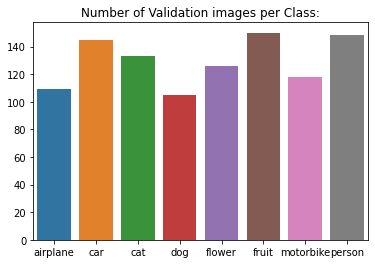

In [3]:
sns.barplot(x=class_names, y=val_img_cat).set_title("Number of Validation images per Class:")

Text(0.5, 1.0, 'Number of Testing images per Class:')

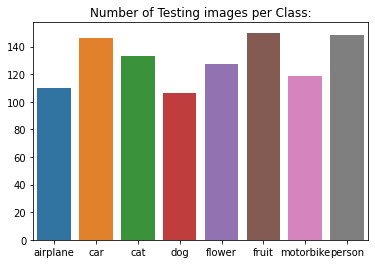

In [4]:
sns.barplot(x=class_names, y=test_img_cat).set_title("Number of Testing images per Class:")

## Data Preprocessing
## Data Augmentation

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train = ImageDataGenerator(rescale= 1/255,
                           rotation_range=10,
                           zoom_range=0.1,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=False,
                           brightness_range=(0.9,1.1),
                           fill_mode='nearest'
                           )
val = ImageDataGenerator(rescale= 1/255)
test = ImageDataGenerator(rescale= 1/255)

train_data = train.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Train/',
                                       target_size=(256,256),
                                       batch_size=32,
                                       class_mode='categorical')
val_data = val.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Validation/',
                                       target_size=(256,256),
                                       batch_size=32,
                                       class_mode='categorical')
test_data = test.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Test/',
                                      target_size=(256,256), 
                                      shuffle = False,
                                      batch_size=32,
                                      class_mode='categorical')

Found 4826 images belonging to 8 classes.
Found 1034 images belonging to 8 classes.
Found 1039 images belonging to 8 classes.


## Tranfer learning model
## InceptionV3

In [ ]:
inception = InceptionV3(include_top=False, weights='imagenet', input_shape=(256,256,3), classes=8)

# make all layers not trainable
for layer in inception.layers:
  layer.trainable = False

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
# flatten output layer to  1 dimention
x = Flatten()(inception.output)
# add dense layer
x = Dense(1024, activation="relu")(x)
x = Dropout(0.50)(x)
x= BatchNormalization()(x)

# output layer
x = Dense(8, activation='sigmoid')(x)

inceptionModel = Model(inputs= inception.inputs, outputs=x)

inceptionModel.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])

In [ ]:
inceptionModel.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

## Fitting the Model

In [ ]:
# fitting the model

result = inceptionModel.fit(train_data,
                            epochs= 10,
                            steps_per_epoch=20,
                            validation_data=val_data
                            )
inceptionModel.save('/content/drive/MyDrive/Thesis_Natural_Images/InceptionV3.h5')

Epoch 1/10
20/20 [==============================] - 828s 41s/step - loss: 1.1557 - acc: 0.9219 - val_loss: 0.6164 - val_acc: 0.9865
Epoch 2/10
20/20 [==============================] - 408s 20s/step - loss: 0.8340 - acc: 0.9891 - val_loss: 0.4186 - val_acc: 0.9942
Epoch 3/10
20/20 [==============================] - 377s 19s/step - loss: 0.6030 - acc: 0.9875 - val_loss: 0.2269 - val_acc: 0.9952
Epoch 4/10
20/20 [==============================] - 336s 17s/step - loss: 0.3879 - acc: 0.9875 - val_loss: 0.0538 - val_acc: 0.9971
Epoch 5/10
20/20 [==============================] - 321s 16s/step - loss: 0.1929 - acc: 0.9969 - val_loss: 0.0326 - val_acc: 0.9981
Epoch 6/10
20/20 [==============================] - 301s 15s/step - loss: 0.0955 - acc: 0.9937 - val_loss: 0.0236 - val_acc: 0.9971
Epoch 7/10
20/20 [==============================] - 282s 14s/step - loss: 0.0576 - acc: 0.9953 - val_loss: 0.0141 - val_acc: 0.9981
Epoch 8/10
20/20 [==============================] - 264s 13s/step - loss: 0.

## Testing

In [ ]:
prediction = inceptionModel.evaluate(test_data, batch_size = 32)
prediction

33/33 [==============================] - 484s 15s/step - loss: 0.0186 - acc: 0.9952


[0.018565533682703972, 0.9951876997947693]

In [ ]:
inceptionModel.save('/content/drive/MyDrive/Thesis_Natural_Images/InceptionV3.h5')

## Model Evaluation

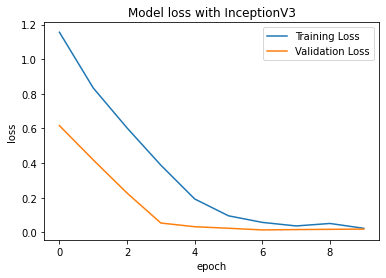

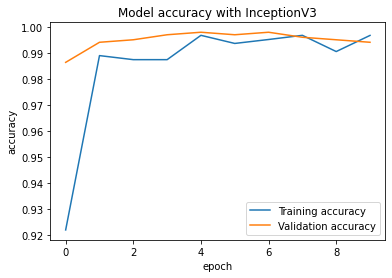

In [ ]:
# Plot.py

plt.plot(result.history['loss'], label='Training Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.title('Model loss with InceptionV3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.plot(result.history['acc'], label='Training accuracy')
plt.plot(result.history['val_acc'], label='Validation accuracy')
plt.title('Model accuracy with InceptionV3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Confusion Matrix

In [10]:
import itertools
import numpy as np


def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
IncV3 = keras.models.load_model('/content/drive/MyDrive/Thesis_Natural_Images/InceptionV3.h5')

In [7]:
#Confution Matrix and Classification Report

Y_pred = IncV3.predict(test_data, 32)
y_pred = np.argmax(Y_pred, axis=1)

In [8]:
cm = confusion_matrix(test_data.classes, y_pred)
cm_plot_labels = class_names
print(cm_plot_labels)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


Confusion matrix, without normalization
[[109   0   0   0   0   1   0   0]
 [  0 146   0   0   0   0   0   0]
 [  0   0 132   1   0   0   0   0]
 [  0   0   0 106   0   0   0   0]
 [  0   0   0   2 124   1   0   0]
 [  0   0   0   0   0 150   0   0]
 [  0   0   0   0   0   0 119   0]
 [  0   0   0   0   0   0   0 148]]
None


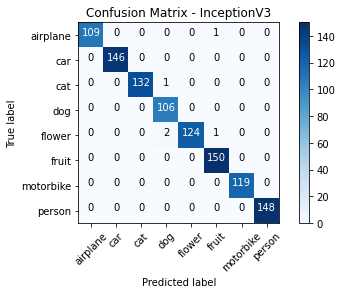

In [11]:
print(plot_confusion_matrix(cm, classes = cm_plot_labels, title='Confusion Matrix - InceptionV3', normalize=False))

## Classification Report

In [ ]:
print('Classification Report for InceptionV3')
print(classification_report(test_data.classes, y_pred, target_names=class_names))

Classification Report for InceptionV3
              precision    recall  f1-score   support

    airplane       1.00      0.99      1.00       110
         car       1.00      1.00      1.00       146
         cat       1.00      0.99      1.00       133
         dog       0.97      1.00      0.99       106
      flower       1.00      0.98      0.99       127
       fruit       0.99      1.00      0.99       150
   motorbike       1.00      1.00      1.00       119
      person       1.00      1.00      1.00       148

    accuracy                           1.00      1039
   macro avg       0.99      0.99      0.99      1039
weighted avg       1.00      1.00      1.00      1039

